## Project Aim

The purpose of this project is to build a model to predict customer churn. This notebook will be used to outline the project and will be used to perform EDA on the data. 
Then, once the data is clean and I am satisfied with the quality of the data, it will be saved and uploaded to datarobot. DataRobot will then be used to identify the best and most apropriate machine learning model to accurately predict customer churn.

### Business Purpose
The business provides services to customers e.g. phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

### Business Goal
The Business Goal of this project is to identify the features which influence customer churn, use ML modeles to predict the likelihood of a customer churn and idenetify ways to decrease customer churn.

### Customer Churn
This is is the loss of clients or customers

### Data Dictionary

| FieldName | Data Type | Description|
|:- | :-: | :- |
|CustomerID|object|Unique number used to identify each customer|
|gender|object|Whether the customer is a male or a female|
|SeniorCitizen|int64 |Whether the customer is a senior citizen or not (1, 0)|
|Partner|object|Whether the customer has a partner or not (Yes, No)|
|Dependents|object|Whether the customer has dependents or not (Yes, No)|
|tenure|int64 |Number of months the customer has stayed with the company|
|PhoneService|object|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|object|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|object|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|object|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|object|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|object |Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|object|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|object|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies|object|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|object|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|object|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|object|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|float64|The amount charged to the customer monthly|
|TotalCharges|object|The total amount charged to the customer|
|Churn|object|Whether the customer churned or not (Yes or No)|

The first thing to do is to read the data and understand the data. To do this we must also import necessary libraries.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("C:/Users/Liam/Documents/DataRobot/Personal Project/Churn/dataset/Telco-Customer-Churn.csv")

## Explorative Data Analysis

Now that we have the dataset into this notebook we can perform EDA on the data.

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.shape

(7043, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df.isna().sum() # there are no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df['customerID'].value_counts # no duplicates

<bound method IndexOpsMixin.value_counts of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object>

In [27]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [28]:
df.describe().transpose() # this only works for columns with numeric Dtype

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## Data Visualisation

Now we will visualise the data to make it easier to see insights and to better understand the data.

#### Gender

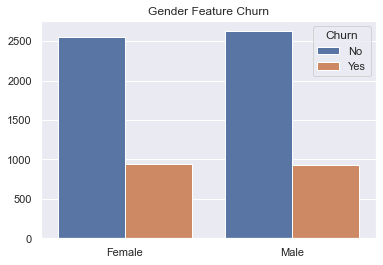

In [29]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['gender'], hue=df['Churn']).set(title='Gender Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [30]:
#Male
df_M = df[df['gender'] == 'Male']
df_M['Churn'].value_counts()

No     2625
Yes     930
Name: Churn, dtype: int64

In [31]:
#Female
df_F = df[df['gender'] == 'Female']
df_F['Churn'].value_counts()

No     2549
Yes     939
Name: Churn, dtype: int64

In [32]:
# Percentage Churn
# male
mn = 2625 # male not churn
my = 930 # male churn
mt = 3555 # male total in df
mc = round((my/mt)*100, 2) # male churn %
print(f"Male Customer Churn = {mc}%")
# female
fn = 2549
fy = 939 
ft = 3488
fc =  round((fy/ft)*100, 2)
print(f"Female Customer Churn = {fc}%")

Male Customer Churn = 26.16%
Female Customer Churn = 26.92%


#### Senior Citizen

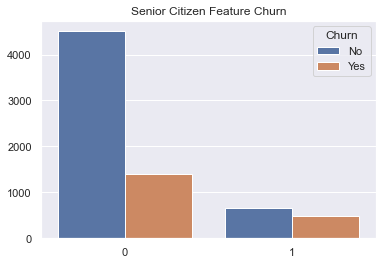

In [33]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['SeniorCitizen'], hue=df['Churn']).set(title='Senior Citizen Feature Churn')
plt.ylabel("")
plt.xlabel("")
None
# 1 is senior citizen, 0 is not

In [34]:
#Not
df_NSC = df[df['SeniorCitizen'] == 0]
df_NSC['Churn'].value_counts()

No     4508
Yes    1393
Name: Churn, dtype: int64

In [35]:
#SeniorC
df_SC = df[df['SeniorCitizen'] == 1]
df_SC['Churn'].value_counts()

No     666
Yes    476
Name: Churn, dtype: int64

In [36]:
# Percentage Churn
# not
nScn = 4508
nScy = 1393
nSnt = nScn + nScy
nScc = round((nScy/nSnt)*100, 2)
print(f"Non-Senior Customer Churn = {nScc}%")
# Senior
Scn = 666
Scy = 476 
Sct = Scn + Scy
Scc =  round((Scy/Sct)*100, 2)
print(f"Senior Citizen Customer Churn = {Scc}%")

Non-Senior Customer Churn = 23.61%
Senior Citizen Customer Churn = 41.68%


#### Partner

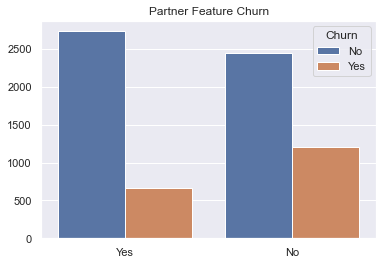

In [37]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Partner'], hue=df['Churn']).set(title='Partner Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [38]:
#No Partner
df_NP = df[df['Partner'] == 'No']
df_NP['Churn'].value_counts()

No     2441
Yes    1200
Name: Churn, dtype: int64

In [39]:
#Partner
df_P = df[df['Partner'] == 'Yes']
df_P['Churn'].value_counts()

No     2733
Yes     669
Name: Churn, dtype: int64

In [40]:
# Percentage Churn
# no partner
npn = 2441
npy = 1200
npt = npn + npy
npc = round((npy/npt)*100, 2)
print(f"Customers without Partners Churn = {npc}%")
# Partner
pn = 2733
py = 669 
pt = pn + py
pc =  round((py/pt)*100, 2)
print(f"Customers with Partners Churn = {pc}%")

Customers without Partners Churn = 32.96%
Customers with Partners Churn = 19.66%


#### Dependents

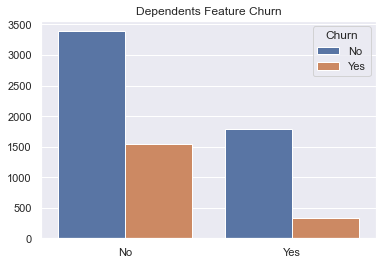

In [41]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Dependents'], hue=df['Churn']).set(title='Dependents Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [42]:
#No Dependents
df_ND = df[df['Dependents'] == 'No']
df_ND['Churn'].value_counts()

No     3390
Yes    1543
Name: Churn, dtype: int64

In [43]:
#Dependents
df_D = df[df['Dependents'] == 'Yes']
df_D['Churn'].value_counts()

No     1784
Yes     326
Name: Churn, dtype: int64

In [44]:
# Percentage Churn
# no dependents
ndn = 3390
ndy = 1543
ndt = ndn + ndy
ndc = round((ndy/ndt)*100, 2)
print(f"Customers without Dependents Churn = {ndc}%")
# With Dependents
dn = 1784
dy = 326 
dt = dn + dy
dc =  round((dy/dt)*100, 2)
print(f"Customers with Partners Churn = {dc}%")

Customers without Dependents Churn = 31.28%
Customers with Partners Churn = 15.45%


#### Phone Service

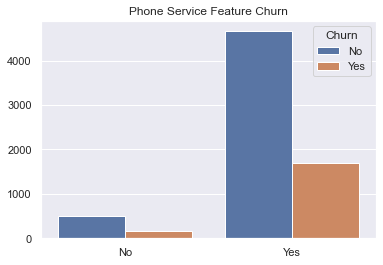

In [45]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['PhoneService'], hue=df['Churn']).set(title='Phone Service Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [46]:
#No P.Service
df_NPS = df[df['PhoneService'] == 'No']
df_NPS['Churn'].value_counts()

No     512
Yes    170
Name: Churn, dtype: int64

In [47]:
#P.Service
df_PS = df[df['PhoneService'] == 'Yes']
df_PS['Churn'].value_counts()

No     4662
Yes    1699
Name: Churn, dtype: int64

In [48]:
# Percentage Churn
# no phone service
psn = 512
psy = 170
pst = psn + psy
psc = round((psy/pst)*100, 2)
print(f"Customers without Phone Service Churn = {psc}%")
# With phone service
dn = 4662
dy = 1699 
dt = dn + dy
dc =  round((dy/dt)*100, 2)
print(f"Customers with Phone Service Churn = {dc}%")

Customers without Phone Service Churn = 24.93%
Customers with Phone Service Churn = 26.71%


#### Multiple Lines

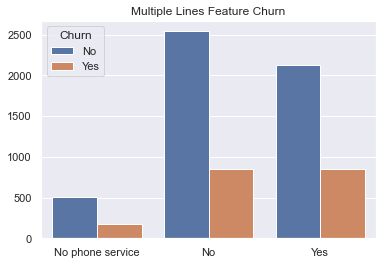

In [49]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['MultipleLines'], hue=df['Churn']).set(title='Multiple Lines Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [50]:
#No P.Service #2 *this is repeated throughout this so the number is consistent in all features
df_NPS2 = df[df['MultipleLines'] == 'No phone service']
df_NPS2['Churn'].value_counts()

No     512
Yes    170
Name: Churn, dtype: int64

In [51]:
#No M.lines
df_NMls = df[df['MultipleLines'] == 'No']
df_NMls['Churn'].value_counts()

No     2541
Yes     849
Name: Churn, dtype: int64

In [52]:
#M.lines
df_Mls = df[df['MultipleLines'] == 'Yes']
df_Mls['Churn'].value_counts()

No     2121
Yes     850
Name: Churn, dtype: int64

In [53]:
# Percentage Churn
# no phone service - using the first calculation as it is consistent
psn = 512
psy = 170
pst = psn + psy
psc = round((psy/pst)*100, 2)
print(f"Customers without Phone Service Churn = {psc}%")
# No multiple lines
nmln = 2541
nmly = 849 
nmlt = nmln + nmly
nmlc =  round((nmly/nmlt)*100, 2)
print(f"Customers without Multiple Lines Churn = {nmlc}%")
# With multiple lines
mln = 2121
mly = 850 
mlt = mln + mly
mlc =  round((mly/mlt)*100, 2)
print(f"Customers with Multiple Lines Churn = {mlc}%")

Customers without Phone Service Churn = 24.93%
Customers without Multiple Lines Churn = 25.04%
Customers with Multiple Lines Churn = 28.61%


#### Internet Service

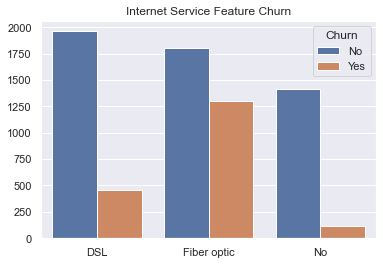

In [54]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['InternetService'], hue=df['Churn']).set(title='Internet Service Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [55]:
#DSL
df_DSL = df[df['InternetService'] == 'DSL']
df_DSL['Churn'].value_counts()

No     1962
Yes     459
Name: Churn, dtype: int64

In [56]:
#F.Optic
df_FOL = df[df['InternetService'] == 'Fiber optic']
df_FOL['Churn'].value_counts()

No     1799
Yes    1297
Name: Churn, dtype: int64

In [57]:
#No I.Service
df_NIS = df[df['InternetService'] == 'No']
df_NIS['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [58]:
# Percentage Churn
# DSL
dsln = 1962
dsly = 459
dslt = dsln + dsly
dslc = round((dsly/dslt)*100, 2)
print(f"Customers with DSL Churn = {dslc}%")
# Fibre Optic
fon = 1799
foy = 1297 
fot = fon + foy
foc =  round((foy/fot)*100, 2)
print(f"Customers with Fiber Optic Churn = {foc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers with DSL Churn = 18.96%
Customers with Fiber Optic Churn = 41.89%
Customers with no Internet Service Churn = 7.4%


#### Online Security

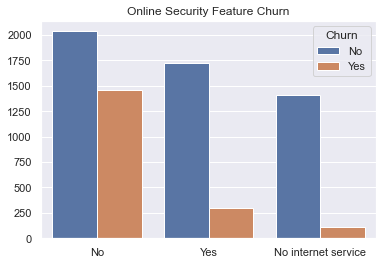

In [59]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['OnlineSecurity'], hue=df['Churn']).set(title='Online Security Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [60]:
#No O.Security
df_NOS = df[df['OnlineSecurity'] == 'No']
df_NOS['Churn'].value_counts()

No     2037
Yes    1461
Name: Churn, dtype: int64

In [61]:
#O.Security
df_OS = df[df['OnlineSecurity'] == 'Yes']
df_OS['Churn'].value_counts()

No     1724
Yes     295
Name: Churn, dtype: int64

In [62]:
#No I.Service #2
df_NIS2 = df[df['OnlineSecurity'] == 'No internet service']
df_NIS2['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [63]:
# Percentage Churn
# No Online Security
nosn = 2037
nosy = 1461
nost = nosn + nosy
nosc = round((nosy/nost)*100, 2)
print(f"Customers with DSL Churn = {nosc}%")
# With Online Security
osn = 1724
osy = 295 
ost = osn + osy
osc =  round((osy/ost)*100, 2)
print(f"Customers with Online Security Churn = {osc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers with DSL Churn = 41.77%
Customers with Online Security Churn = 14.61%
Customers with no Internet Service Churn = 7.4%


#### Online Backup

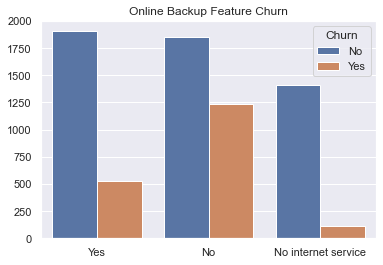

In [64]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['OnlineBackup'], hue=df['Churn']).set(title='Online Backup Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [65]:
#O.B
df_OB = df[df['OnlineBackup'] == 'Yes']
df_OB['Churn'].value_counts()

No     1906
Yes     523
Name: Churn, dtype: int64

In [66]:
#NO.B
df_NOB = df[df['OnlineBackup'] == 'No']
df_NOB['Churn'].value_counts()

No     1855
Yes    1233
Name: Churn, dtype: int64

In [67]:
#No IS #3
df_NIS3 = df[df['OnlineBackup'] == 'No internet service']
df_NIS3['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [68]:
# Percentage Churn
# With Online Backup
obn = 1906
oby = 523
obt = obn + oby
obc = round((oby/obt)*100, 2)
print(f"Customers with Online Backup Churn = {obc}%")
# Without Online Backup
wobn = 1855
woby = 1233 
wobt = wobn + woby
wobc =  round((woby/wobt)*100, 2)
print(f"Customers without Online Backup Churn = {wobc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers with Online Backup Churn = 21.53%
Customers without Online Backup Churn = 39.93%
Customers with no Internet Service Churn = 7.4%


#### Device Protection

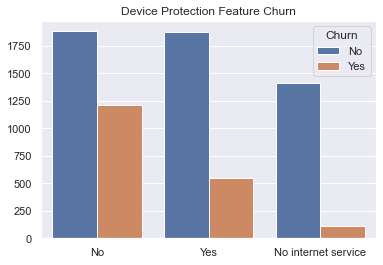

In [69]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['DeviceProtection'], hue=df['Churn']).set(title='Device Protection Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [70]:
#No D.Protection
df_NDP = df[df['DeviceProtection'] == 'No']
df_NDP['Churn'].value_counts()

No     1884
Yes    1211
Name: Churn, dtype: int64

In [71]:
#D.Protection
df_DP = df[df['DeviceProtection'] == 'Yes']
df_DP['Churn'].value_counts()

No     1877
Yes     545
Name: Churn, dtype: int64

In [72]:
#No IS #4
df_NIS4 = df[df['DeviceProtection'] == 'No internet service']
df_NIS4['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [73]:
# Percentage Churn
# No Data Protection
ndpn = 1884
ndpy = 1211
ndpt = ndpn + ndpy
ndpc = round((ndpy/ndpt)*100, 2)
print(f"Customers without Data Protection Churn = {ndpc}%")
# With Data Protection
dpn = 1877
dpy = 545 
dpt = dpn + dpy
dpc =  round((dpy/dpt)*100, 2)
print(f"Customers with Data Protection Churn = {dpc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers without Data Protection Churn = 39.13%
Customers with Data Protection Churn = 22.5%
Customers with no Internet Service Churn = 7.4%


#### Tech Support

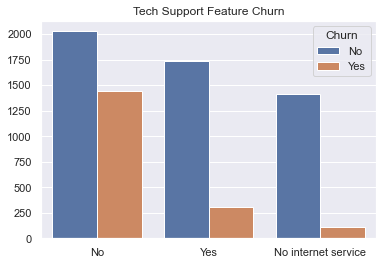

In [74]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['TechSupport'], hue=df['Churn']).set(title='Tech Support Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [75]:
#No T.Support
df_NTS = df[df['TechSupport'] == 'No']
df_NTS['Churn'].value_counts()

No     2027
Yes    1446
Name: Churn, dtype: int64

In [76]:
#T.Support
df_TS = df[df['TechSupport'] == 'Yes']
df_TS['Churn'].value_counts()

No     1734
Yes     310
Name: Churn, dtype: int64

In [77]:
#No IS #5
df_NIS5 = df[df['TechSupport'] == 'No internet service']
df_NIS5['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [78]:
# Percentage Churn
# No Tech Support
ntsn = 2027
ntsy = 1446
ntst = ntsn + ntsy
ntsc = round((ntsy/ntst)*100, 2)
print(f"Customers with No Tech Support = {ntsc}%")
# With Tech Support
tsn = 1734
tsy = 310 
tst = tsn + tsy
tsc =  round((tsy/tst)*100, 2)
print(f"Customers with Tech Support Churn = {tsc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers with No Tech Support = 41.64%
Customers with Tech Support Churn = 15.17%
Customers with no Internet Service Churn = 7.4%


#### Streaming TV

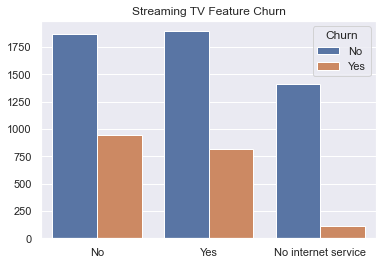

In [79]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['StreamingTV'], hue=df['Churn']).set(title='Streaming TV Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [80]:
#No S.TV
df_NSTV = df[df['StreamingTV'] == 'No']
df_NSTV['Churn'].value_counts()

No     1868
Yes     942
Name: Churn, dtype: int64

In [81]:
#S.TV
df_STV = df[df['StreamingTV'] == 'Yes']
df_STV['Churn'].value_counts()

No     1893
Yes     814
Name: Churn, dtype: int64

In [82]:
#No IS #6
df_NIS6 = df[df['StreamingTV'] == 'No internet service']
df_NIS6['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [83]:
# Percentage Churn
# No Streaming TV
ntvn = 1868
ntvy = 942
ntvt = ntvn + ntvy
ntvc = round((ntvy/ntvt)*100, 2)
print(f"Customers with No Streaming TV = {ntvc}%")
# With Streaming TV
tvn = 1893
tvy = 814 
tvt = tvn + tvy
tvc =  round((tvy/tvt)*100, 2)
print(f"Customers with Streaming TV Churn = {tvc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers with No Streaming TV = 33.52%
Customers with Streaming TV Churn = 30.07%
Customers with no Internet Service Churn = 7.4%


#### Streaming Movies

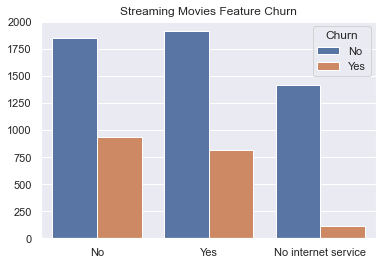

In [84]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['StreamingMovies'], hue=df['Churn']).set(title='Streaming Movies Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [85]:
#No S.Movies
df_NSM = df[df['StreamingMovies'] == 'No']
df_NSM['Churn'].value_counts()

No     1847
Yes     938
Name: Churn, dtype: int64

In [86]:
#S.Movies
df_NSM = df[df['StreamingMovies'] == 'Yes']
df_NSM['Churn'].value_counts()

No     1914
Yes     818
Name: Churn, dtype: int64

In [87]:
#No IS #7
df_NIS7 = df[df['StreamingMovies'] == 'No internet service']
df_NIS7['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [88]:
# Percentage Churn
# No Streaming Movies
nmn = 1847
nmy = 938
nmt = nmn + nmy
nmc = round((nmy/nmt)*100, 2)
print(f"Customers with No Streaming Movie Churn = {nmc}%")
# With Streaming Movies
mn = 1893
my = 814 
mt = mn + my
mc =  round((my/mt)*100, 2)
print(f"Customers with Streaming Movie Churn = {mc}%")
# No internet service
nisn = 1413
nisy = 113 
nist = nisn + nisy
nisc =  round((nisy/nist)*100, 2)
print(f"Customers with no Internet Service Churn = {nisc}%")

Customers with No Streaming Movie Churn = 33.68%
Customers with Streaming Movie Churn = 30.07%
Customers with no Internet Service Churn = 7.4%


#### Contract

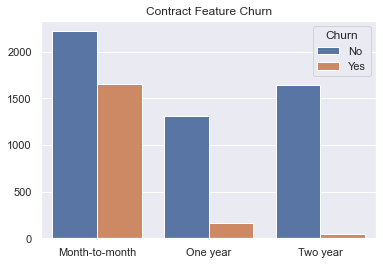

In [89]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Contract'], hue=df['Churn']).set(title='Contract Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [90]:
#Month to month
df_MtM = df[df['Contract'] == 'Month-to-month']
df_MtM['Churn'].value_counts()

No     2220
Yes    1655
Name: Churn, dtype: int64

In [91]:
#1 Year
df_1Y = df[df['Contract'] == 'One year']
df_1Y['Churn'].value_counts()

No     1307
Yes     166
Name: Churn, dtype: int64

In [92]:
#2 Year
df_2Y = df[df['Contract'] == 'Two year']
df_2Y['Churn'].value_counts()

No     1647
Yes      48
Name: Churn, dtype: int64

In [93]:
# Percentage Churn
# month-to-month contract
m2mn = 2220
m2my = 1655
m2mt = m2mn + m2my
m2mc = round((m2my/m2mt)*100, 2)
print(f"Customers with Month-To-Month Contract Churn  = {m2mc}%")
# 1 year contract
yn = 1307
yy = 166 
yt = yn + yy
yc =  round((yy/yt)*100, 2)
print(f"Customers with 1 Year Contract Churn = {yc}%")
# 2 year contract
tyn = 1647
tyy = 48 
tyt = tyn + tyy
tyc =  round((tyy/tyt)*100, 2)
print(f"Customers with 2 Year Contract Churn = {tyc}%")

Customers with Month-To-Month Contract Churn  = 42.71%
Customers with 1 Year Contract Churn = 11.27%
Customers with 2 Year Contract Churn = 2.83%


#### Paperless Billing

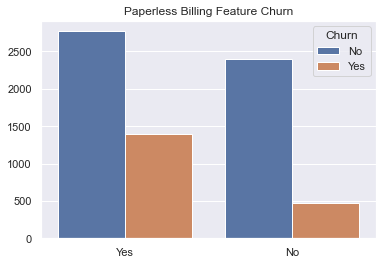

In [94]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['PaperlessBilling'], hue=df['Churn']).set(title='Paperless Billing Feature Churn')
plt.ylabel("")
plt.xlabel("")
None

In [95]:
#P.Billing
df_PB = df[df['PaperlessBilling'] == 'Yes']
df_PB['Churn'].value_counts()

No     2771
Yes    1400
Name: Churn, dtype: int64

In [96]:
#Np P.Billing
df_NPB = df[df['PaperlessBilling'] == 'No']
df_NPB['Churn'].value_counts()

No     2403
Yes     469
Name: Churn, dtype: int64

In [97]:
# Percentage Churn
# paperless billing
pbn = 2771
pby = 1400
pbt = pbn + pby
pbc = round((pby/pbt)*100, 2)
print(f"Customers with Paperless Billing Churn = {pbc}%")
# no paperless billing
npbn = 1307
npby = 166 
npbt = npbn + npby
npbc =  round((npby/npbt)*100, 2)
print(f"Customers without Paperless Billing Churn = {npbc}%")

Customers with Paperless Billing Churn = 33.57%
Customers without Paperless Billing Churn = 11.27%


#### Payment Method

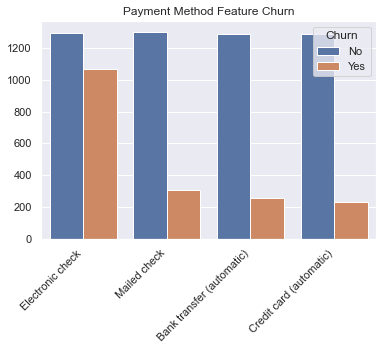

In [98]:
sns.set_theme(style="darkgrid")
chart = sns.countplot(x = df['PaymentMethod'], hue=df['Churn'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xlabel("")
chart.set_ylabel("")
chart.set_title("Payment Method Feature Churn")
None

In [99]:
#E.Check
df_EC = df[df['PaymentMethod'] == 'Electronic check']
df_EC['Churn'].value_counts()

No     1294
Yes    1071
Name: Churn, dtype: int64

In [100]:
#M.Check
df_MC = df[df['PaymentMethod'] == 'Mailed check']
df_MC['Churn'].value_counts()

No     1304
Yes     308
Name: Churn, dtype: int64

In [101]:
#B.transfer (auto)
df_Bta = df[df['PaymentMethod'] == 'Bank transfer (automatic)']
df_Bta['Churn'].value_counts()

No     1286
Yes     258
Name: Churn, dtype: int64

In [102]:
#C.Card (auto)
df_CCa = df[df['PaymentMethod'] == 'Credit card (automatic)']
df_CCa['Churn'].value_counts()

No     1290
Yes     232
Name: Churn, dtype: int64

In [103]:
# Percentage Churn
# electronic CHeck
ecn = 1294
ecy = 1071
ect = ecn + ecy
ecc = round((ecy/ect)*100, 2)
print(f"Customers Paying by Electronic Check Churn = {ecc}%")
# mailed check
mcn = 1304
mcy = 308 
mct = mcn + mcy
mcc =  round((mcy/mct)*100, 2)
print(f"Customers Paying by Mailed Check Churn = {mcc}%")
# bank transfer (auto)
btn = 1286
bty = 258
btt = btn + bty
btc = round((bty/btt)*100, 2)
print(f"Customers Paying by Bank Transfer (Auto) Churn = {btc}%")
# credit card (auto)
ccn = 1290
ccy = 232 
cct = ccn + ccy
ccc =  round((ccy/cct)*100, 2)
print(f"Customers Paying by Credit Card (Auto) Churn = {ccc}%")

Customers Paying by Electronic Check Churn = 45.29%
Customers Paying by Mailed Check Churn = 19.11%
Customers Paying by Bank Transfer (Auto) Churn = 16.71%
Customers Paying by Credit Card (Auto) Churn = 15.24%


#### Churn

No     5174
Yes    1869
Name: Churn, dtype: int64


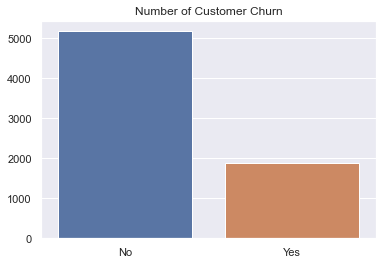

In [104]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Churn']).set(title='Number of Customer Churn')
plt.ylabel("")
plt.xlabel("")
num_churn = df['Churn'].value_counts()
print(num_churn)

In [105]:
# Percentage Customer Churn
num_churn = 1869
num_not_churn = 5174
churned = round((num_churn/num_not_churn)*100, 2)
print(f"The percentage of customer churn for this company is: {churned}%")

The percentage of customer churn for this company is: 36.12%


### Features that were not visualised

The following features in the dataset have not been visualised yet because they contain a wide range of values making it hard to visualise apropriately.

    df['tenure']) = Number of months the customer has been with company


    df['MonthlyCharges'] = The amount charged to the customer monthly


    df['TotalCharges'] = Total amount charged to the customer

I will open the data into excel and create a new columns which contains a nested IF functions to sort the values into a range so that the data can be visualised. This dataset will have a new name and so I will need to read the data again. Note: No changes will be made to the data itself.

In [106]:
# Need to find the max value for each column so an appropriate range can be determined
print(df['tenure'].max())
print(df['MonthlyCharges'].max())
print(df['TotalCharges'].max())

72
118.75
999.9


In [107]:
df_range = pd.read_csv(r"C:\Users\Liam\Desktop\Personal Projects\Project 10 - Customer Churn Prediction\data_with_range.csv")

In [108]:
df_range.head() # this has a new index but we can ignore it because it doesn't affect the data and we only want
                # with the ranges the additional columns 

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Range,Monthly Charge Range,Total Charge Range
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1,25-50,0-999
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,No,One year,No,Mailed check,56.95,1889.5,No,2-3,50-75,1000-1999
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1,50-75,0-999
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4,25-50,1000-1999
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1,50-75,0-999


In [109]:
df_range['Tenure Range'].value_counts()

0-1     2186
5-6     1407
 1-2    1024
2-3      832
4-5      832
3-4      762
Name: Tenure Range, dtype: int64

#### Tenure

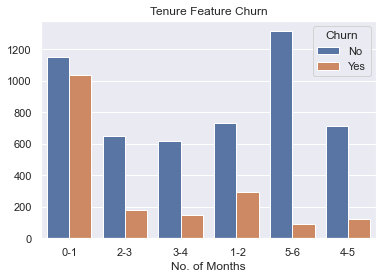

In [110]:
sns.set_theme(style="darkgrid")
chart = sns.countplot(x = df_range['Tenure Range'], hue=df['Churn'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='center')
chart.set_xlabel("No. of Months")
chart.set_ylabel("")
chart.set_title("Tenure Feature Churn")
None

In [111]:
#0-1
df_01 = df_range[df_range['Tenure Range'] == '0-1']
df_01['Churn'].value_counts()

No     1149
Yes    1037
Name: Churn, dtype: int64

In [112]:
#1-2
df_12 = df_range[df_range['Tenure Range'] == ' 1-2'] # there is a 'space' before 1-2
df_12['Churn'].value_counts()

No     730
Yes    294
Name: Churn, dtype: int64

In [113]:
#2-3
df_23 = df_range[df_range['Tenure Range'] == '2-3']
df_23['Churn'].value_counts()

No     652
Yes    180
Name: Churn, dtype: int64

In [114]:
#3-4
df_34 = df_range[df_range['Tenure Range'] == '3-4']
df_34['Churn'].value_counts()

No     617
Yes    145
Name: Churn, dtype: int64

In [115]:
#4-5
df_45 = df_range[df_range['Tenure Range'] == '4-5']
df_45['Churn'].value_counts()

No     712
Yes    120
Name: Churn, dtype: int64

In [116]:
#5-6
df_56 = df_range[df_range['Tenure Range'] == '5-6']
df_56['Churn'].value_counts()

No     1314
Yes      93
Name: Churn, dtype: int64

In [117]:
# Percentage Churn 
#remember that the earlier comment mentioned error in the range parameters. However, it should be ok and just note to be
#more careful next time.
# 0-1
an = 1149
ay = 1037
at = an + ay
ac = round((ay/at)*100, 2)
print(f"Customers with a Tenure between 0-1 Months = {ac}%")
# 1-2
bn = 730
by = 294
bt = bn + by
bc = round((by/bt)*100, 2)
print(f"Customers with a Tenure between 1-2 Months = {bc}%")
# 2-3
cn = 652
cy = 180
ct = cn + cy
cc = round((cy/ct)*100, 2)
print(f"Customers with a Tenure between 2-3 Months = {cc}%")
# 3-4
dn = 617
dy = 145
dt = dn + dy
dc = round((dy/dt)*100, 2)
print(f"Customers with a Tenure between 3-4 Months = {dc}%")
# 4-5
en = 712
ey = 120
et = en + ey
ec = round((ey/et)*100, 2)
print(f"Customers with a Tenure between 4-5 Months = {ec}%")
# 5-6
fn = 1314
fy = 93
ft = fn + fy
fc = round((fy/ft)*100, 2)
print(f"Customers with a Tenure between 5-6 Months = {fc}%")

Customers with a Tenure between 0-1 Months = 47.44%
Customers with a Tenure between 1-2 Months = 28.71%
Customers with a Tenure between 2-3 Months = 21.63%
Customers with a Tenure between 3-4 Months = 19.03%
Customers with a Tenure between 4-5 Months = 14.42%
Customers with a Tenure between 5-6 Months = 6.61%


#### Monthly Charge Range

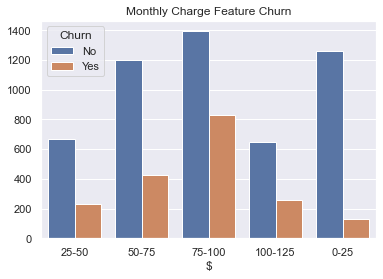

In [118]:
# forgot to change the labels to 25-49 etc...will change this and the space ofr 1-2 after *the dataset has changed for 
# some weird reason so I will leave this and will make sure not to repeat this error in the future

sns.set_theme(style="darkgrid")
chart = sns.countplot(x = df_range['Monthly Charge Range'], hue=df['Churn'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='center')
chart.set_xlabel("$")
chart.set_ylabel("")
chart.set_title("Monthly Charge Feature Churn")
None

In [119]:
#0-25
df_025 = df_range[df_range['Monthly Charge Range'] == '0-25']
df_025['Churn'].value_counts()

No     1262
Yes     127
Name: Churn, dtype: int64

In [120]:
#25-50
df_2550 = df_range[df_range['Monthly Charge Range'] == '25-50']
df_2550['Churn'].value_counts()

No     671
Yes    234
Name: Churn, dtype: int64

In [121]:
#50-75
df_5075 = df_range[df_range['Monthly Charge Range'] == '50-75']
df_5075['Churn'].value_counts()

No     1197
Yes     424
Name: Churn, dtype: int64

In [122]:
#75-100
df_75100 = df_range[df_range['Monthly Charge Range'] == '75-100']
df_75100['Churn'].value_counts()

No     1393
Yes     827
Name: Churn, dtype: int64

In [123]:
#100-125
df_100125 = df_range[df_range['Monthly Charge Range'] == '100-125']
df_100125['Churn'].value_counts()

No     651
Yes    257
Name: Churn, dtype: int64

In [124]:
# Percentage Churn 
# 0-25
gn = 1262
gy = 127
gt = gn + gy
gc = round((gy/gt)*100, 2)
print(f"Customers with a Monthly Charge between 0-25$ = {gc}%")
# 25-50
hn = 671
hy = 234
ht = hn + hy
hc = round((hy/ht)*100, 2)
print(f"Customers with a Monthly Charge between 25-50$ = {hc}%")
# 50-75
iin = 1197
iy = 424
it = iin + iy
ic = round((iy/it)*100, 2)
print(f"Customers with a Monthly Charge between 50-75$ = {ic}%")
# 75-100
jn = 1393
jy = 827
jt = jn + jy
jc = round((jy/jt)*100, 2)
print(f"Customers with a Monthly Charge between 75-100$ = {jc}%")
# 100-125
kn = 651
ky = 257
kt = kn + ky
kc = round((ky/kt)*100, 2)
print(f"Customers with a Monthly Charge between 100-125$ = {kc}%")

Customers with a Monthly Charge between 0-25$ = 9.14%
Customers with a Monthly Charge between 25-50$ = 25.86%
Customers with a Monthly Charge between 50-75$ = 26.16%
Customers with a Monthly Charge between 75-100$ = 37.25%
Customers with a Monthly Charge between 100-125$ = 28.3%


#### Total Charge

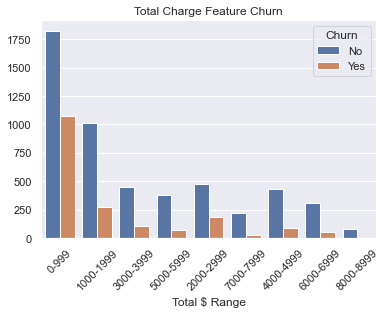

In [125]:
# Need to go into df and order
sns.set_theme(style="darkgrid")
chart = sns.countplot(x = df_range['Total Charge Range'], hue=df['Churn'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='center')
chart.set_xlabel("Total $ Range")
chart.set_ylabel("")
chart.set_title("Total Charge Feature Churn")
None

In [126]:
#0-999
df_1 = df_range[df_range['Total Charge Range'] == '0-999']
df_1['Churn'].value_counts()

No     1823
Yes    1070
Name: Churn, dtype: int64

In [127]:
#1000-1999
df_2 = df_range[df_range['Total Charge Range'] == '1000-1999']
df_2['Churn'].value_counts()

No     1014
Yes     269
Name: Churn, dtype: int64

In [128]:
#2000-2999
df_3 = df_range[df_range['Total Charge Range'] == '2000-2999']
df_3['Churn'].value_counts()

No     472
Yes    180
Name: Churn, dtype: int64

In [129]:
#3000-3999
df_3 = df_range[df_range['Total Charge Range'] == '3000-3999']
df_3['Churn'].value_counts()

No     449
Yes    107
Name: Churn, dtype: int64

In [130]:
#4000-4999
df_4 = df_range[df_range['Total Charge Range'] == '4000-4999']
df_4['Churn'].value_counts()

No     427
Yes     86
Name: Churn, dtype: int64

In [131]:
#5000-5999
df_5 = df_range[df_range['Total Charge Range'] == '5000-5999']
df_5['Churn'].value_counts()

No     374
Yes     69
Name: Churn, dtype: int64

In [132]:
#6000-6999
df_6 = df_range[df_range['Total Charge Range'] == '6000-6999']
df_6['Churn'].value_counts()

No     310
Yes     55
Name: Churn, dtype: int64

In [133]:
#7000-7999
df_7 = df_range[df_range['Total Charge Range'] == '7000-7999']
df_7['Churn'].value_counts()

No     219
Yes     30
Name: Churn, dtype: int64

In [134]:
#8000-8999
df_8 = df_range[df_range['Total Charge Range'] == '8000-8999']
df_8['Churn'].value_counts()

No     75
Yes     3
Name: Churn, dtype: int64

In [135]:
# Percentage Churn 
# 0-999
ln = 1262
ly = 127
lt = ln + ly
lc = round((ly/lt)*100, 2)
print(f"Customers with a Total Charge between 0-999$ = {lc}%")
# 1000-1999
mn = 671
my = 234
mt = hn + hy
mc = round((hy/ht)*100, 2)
print(f"Customers with a Total Charge between 1000-1999$ = {hc}%")
# 2000-2999
nn = 1197
ny = 424
nt = nn + ny
nc = round((ny/nt)*100, 2)
print(f"Customers with a Total Charge between 2000-2999$ = {nc}%")
# 3000-3999
on = 1393
oy = 827
ot = on + oy
oc = round((oy/ot)*100, 2)
print(f"Customers with a Total Charge between 3000-3999$ = {oc}%")
# 4000-4999
pn = 651
py = 257
pt = pn + py
pc = round((py/pt)*100, 2)
print(f"Customers with a Total Charge between 4000-4999$ = {pc}%")
# 5000-5999
qn = 1197
qy = 424
qt = qn + qy
qc = round((qy/qt)*100, 2)
print(f"Customers with a Total Charge between 5000-5999$ = {qc}%")
# 6000-6999
rn = 1393
ry = 827
rt = rn + ry
rc = round((ry/rt)*100, 2)
print(f"Customers with a Total Charge between 6000-6999$ = {rc}%")
# 7000-7999
sn = 651
sy = 257
st = sn + sy
sc = round((sy/st)*100, 2)
print(f"Customers with a Total Charge between 7000-7999$ = {sc}%")
# 8000-8999
tn = 651
ty = 257
tt = tn + ty
tc = round((ty/tt)*100, 2)
print(f"Customers with a Total Charge between 8000-8999$ = {tc}%")

Customers with a Total Charge between 0-999$ = 9.14%
Customers with a Total Charge between 1000-1999$ = 25.86%
Customers with a Total Charge between 2000-2999$ = 26.16%
Customers with a Total Charge between 3000-3999$ = 37.25%
Customers with a Total Charge between 4000-4999$ = 28.3%
Customers with a Total Charge between 5000-5999$ = 26.16%
Customers with a Total Charge between 6000-6999$ = 37.25%
Customers with a Total Charge between 7000-7999$ = 28.3%
Customers with a Total Charge between 8000-8999$ = 28.3%


### Analysis of the dataset

1. No null values
2. No missing values
3. No data which must be changed
4. Data is clean

### Analysis of the visuals

The visualisations above show each feature, the possible values for the features and the number of values corresponding to each customer. We can see that all but one of the features show clear changes on customer churn due to the selected values. The feature that shows very little influence on churn is gender because the customer churn is almost identical for both genders.

However, ALL other features in this dataset influence whether or not a customer leaves or stays with Telco. 

Here is a table of the features in this dataset aloong with the option which gives the highest customer churn and the option which gives the lowest customer churn:

| Feature | Highest Churn | % | Lowest Churn | % |
| :- | :- | :-: | :- | :-: |
| Gender | Female | 26.92% | Male | 26.16% |
| SeniorCitizen | Senior Citizen | 41.68% | Not Senior Citizen | 23.61% |
| Partner | Without Partners | 32.96% | With Partners | 19.66% |
| Dependents | Without Dependents | 31.28% | With Dependents | 15.45% |
| Tenure (range) | 0-1 Months | 47.44% | 5-6 Months | 6.61% |      
| PhoneService | With Phone Service | 26.71% | Without Phone Service | 24.93% |  
| MultipleLines | With Multiple Lines | 28.61% | Without Phone Service | 24.93% |
| InternetService | With Fiber Optic | 41.89% | No Internet Service | 7.4% |
| OnlineSecurity | With DSL | 41.77% | No Internet | 7.4% |
| OnlineBackup | Without Online Backup | 39.93% | No Internet Service | 7.4% |
| DeviceProtection | Without Data Protection | 39.13% | No Internet Service | 7.4% |  
| TechSupport | Without Tech Support | 41.64% | No Internet Service | 7.4% |
| StreamingTV | Without Streaming TV | 33.52% | No Internet Service | 7.4% |
| StreamingMovies | Without Streaming Movie | 33.68% | No Internet Service | 7.4% |
| Contract | Month-to-Month | 42.17% | 2 Year Contract | 2.83% |
| PaperlessBilling | With Paperless Billing | 33.57% | Without Paperless Billing | 11.27% |
| PaymentMethod | Electronic Check | 45.29% | Credit Card (auto) | 15.24% |
| MonthlyCharges (range) | 75-100 | 37.25% | 0-25 | 9.14% |
| TotalCharges (range) | 3000-3999 (tied with) 6000-6999 | 37.25% | 0-999$ | 9.14% |

### What does the table show?

From the table above, we can see that the top 3 features that affect customer churn is:

    Tenure Range: 0-1 months = 47.44%
    Payment method: Credit card auto = 45.29%
    Contract: month-to-month = 42.17%
    
    
Possible reasons explaining why these features result in high customer churn:

    The 0-1 month tenure range results in a high customer churn because; 
    - they are new customers and found better deals elsewhere, 
    - they realized they no longer needed the service and so cancelled,
    - simply changed their mind.
    
    The credit card payment method results in a high customer churn due to the customers; 
    - recieving notifications about the money going out of their account and then remember about the cost and cancel 
    the service.
      
    The month-to-month contract results in a high customer churn because;
    - the customer wanted to test the service and decided that it was not worth the money or no longer needed it

### What to do with these results?

From these results we can remove options for certain features like month-to-moth contracts and limit them to longer contracts so that we reduce the customer churn. Basically, we could go through each feature, one by one, and decide which feature needs changing in irder to reduce customer churn.

### Saving the cleaned data into a csv file

I will now save this dataset as a csv file and upload it to DataRobot and use ML models to predict churn. Then I may come back to this notebook and attemot to do the same process but manually using python.

In [136]:
from pathlib import Path  
filepath = Path(r'C:\Users\Liam\Desktop\Personal Projects\Project 10 - Customer Churn Prediction\clean_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

### Results from DataRobot

In [137]:
df_feature_impact = pd.read_csv(r'C:\Users\Liam\Desktop\Personal Projects\Project 10 - Customer Churn Prediction\Results\Feature Impact for Light Gradient Boosted Trees Classifier with Early Stopping using 2500 rows.csv')
df_roc_curve = pd.read_csv(r'C:\Users\Liam\Desktop\Personal Projects\Project 10 - Customer Churn Prediction\Results\Light Gradient Boosted Trees Classifier with Early Stopping (Holdout) ROC Curve.csv')
df_variable_importance = pd.read_csv(r'C:\Users\Liam\Desktop\Personal Projects\Project 10 - Customer Churn Prediction\Results\Tree-based Variable Importance for RandomForest Classifier (Gini).csv')

In [138]:
df_feature_impact

,Feature Name,Relative Importance
0,tenure,1.000000
1,Contract,0.273386
2,InternetService,0.246818
3,MonthlyCharges,0.149713
4,OnlineSecurity,0.081979
5,TechSupport,0.046820
6,TotalCharges,0.046664
7,PaymentMethod,0.043666
8,MultipleLines,0.037536
9,PaperlessBilling,0.035199


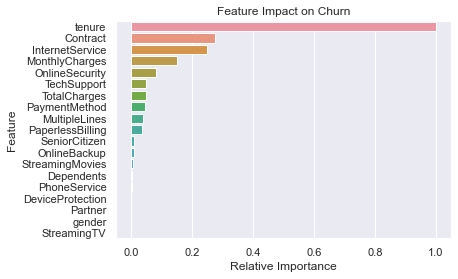

In [139]:
y = df_feature_impact['Feature Name']
x = df_feature_impact['Relative Importance']
ax = sns.barplot(x=x, y=y, data=df_feature_impact).set(title='Feature Impact on Churn')
plt.ylabel("Feature")
plt.xlabel("Relative Importance")
None

##### Feature Impact = View the impact of each feature in the feature list by measuring how shuffling a feature affects the model's predictive accuracy.

In [140]:
df_variable_importance

,Value,Count
0,Contract,1.000000
1,tenure,0.811210
2,TotalCharges,0.600593
3,MonthlyCharges,0.510815
4,TechSupport,0.465323
5,OnlineSecurity,0.443149
6,InternetService,0.324714
7,OnlineBackup,0.178128
8,PaymentMethod,0.157654
9,DeviceProtection,0.116056


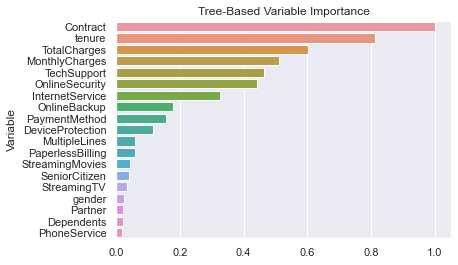

In [141]:
x = df_variable_importance['Count']
y = df_variable_importance['Value']
ax = sns.barplot(x=x, y=y, data=df_variable_importance).set(title='Tree-Based Variable Importance')
plt.xlabel("")
plt.ylabel("Variable")
None

##### Tree-Based Variable Importance = For tree/forrest based models, illustrates the relevancy of different variables on the prediction.

In [142]:
df_roc_curve.head()

,Accuracy,F1,False Negative Scores,True Negative Scores,True Negative Rates,True Positive Scores,Positive Predictive Values,False Positive Scores,False Positive Rates,Negative Predictive Values,True Positive Rates,Matthews Correlation Coefficient,Threshold,Fraction Predicted As Positive,Fraction Predicted As Negative,Lift For Positive Class,Lift For Negative Class
0,0.734375,0.000000,374.0,1034.0,1.0,0.0,0.0,0.0,0.0,0.734375,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,0.735795,0.010638,372.0,1034.0,1.0,2.0,1.0,0.0,0.0,0.735420,0.005348,0.062711,0.880202,0.001420,0.998580,3.764706,1.001422
2,0.738636,0.031579,368.0,1034.0,1.0,6.0,1.0,0.0,0.0,0.737518,0.016043,0.108774,0.870361,0.004261,0.995739,3.764706,1.004280
3,0.743608,0.067183,361.0,1034.0,1.0,13.0,1.0,0.0,0.0,0.741219,0.034759,0.160513,0.848570,0.009233,0.990767,3.764706,1.009319
4,0.752841,0.130000,348.0,1034.0,1.0,26.0,1.0,0.0,0.0,0.748191,0.069519,0.228064,0.814352,0.018466,0.981534,3.764706,1.018813


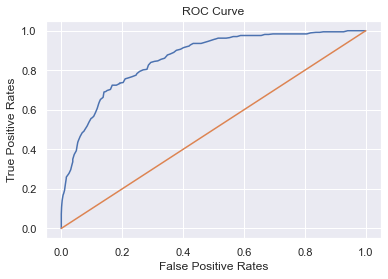

In [143]:
y = df_roc_curve['True Positive Rates']
x = df_roc_curve['False Positive Rates']
plt.plot(x,y)
ident = [0.0, 1.0]
plt.plot(ident,ident)
plt.ylabel('True Positive Rates')
plt.xlabel('False Positive Rates')
plt.title('ROC Curve')
plt.show()

##### ROC Curve = A set of interactive displays that provide a snapshot of the model’s classification power.

### Analysis of the results from DataRobot

From the plot of feature impact on churn, Datarobot has tenure, contract and internet service as the top 3 features that impact customer churn. Comparing that with the analysis of the visuals previous, we almost reached the same conclusion except that the visuals showed credit card payment method and not internet services. This could be due to the summation of all internet fetures completed by DataRobot but would need to be investigated further.

### Further Work

Create a function that pulls the data from the df and stores the important calculations so that the calculations and reports can be updated easily and automatically whenever the df changes.

We could deploy and predict the model on new, unseen data to make predictions based on additional features.

We could try other ml models and compare the predicitons made.